# Лабораторная работа №5: Исследование результатов фильтрации дискретного сигнала с помощью нерекурсивных фильтров, построенных на основе полиномиальных приближений

Выполнили студенты гр. 2384 Тимченко Дмитрий Алексеевич и Цыганков Роман Максимович. Вариант №19.


## Цель работы

Получение практических навыков выполнения фильтрации дискретных последовательностей с помощью полиномиальных фильтров, а также анализа получаемых результатов с помощью дискретного преобразования Фурье (ДПФ).


# Основные теоретические положения

## Формирование аналогового и дискретного сигнала

В работе рассматривается непрерывный аналоговый сигнал, представляющий собой линейную комбинацию косинусоид:

$$
x(t) = \sum_{k=0}^{10} A_k \cos(\omega_k t + \phi_k),
$$

где:  
- $A_k$ — амплитуды гармоник (случайные целые значения от 1 до 11),  
- $omega_k$ — частоты гармоник, равномерно распределённые от 0 до $\pi$ с шагом $\Delta\omega = 0.1\pi$,  
- $\phi_k$ — случайные начальные фазы в диапазоне \([0, 0.5]\).

Дискретизация проводится с шагом \(T = 1\), поэтому дискретный сигнал задаётся выражением:

$$
x[n] = x(t=n) = \sum_{k=0}^{10} A_k \cos(\omega_k n + \phi_k), \quad n=0,1,\dots,31.
$$

Таким образом формируется последовательность из 32 отсчётов (\(N = 32\)).

---

## Дискретное преобразование Фурье

Спектральные отсчёты дискретного сигнала находятся с помощью ДПФ:

$$
X[k] = \sum_{n=0}^{N-1} x[n] e^{-i\frac{2\pi}{N}kn}, \quad k=0,\dots,N-1.
$$

ДПФ позволяет получить частотное представление сигнала и визуализировать его спектр.

---

## Нерекурсивные фильтры

Нерекурсивные фильтры (FIR-фильтры) основаны на полиномиальном сглаживании и имеют передаточную функцию вида:

$$H(\omega) = \sum_{k=-m}^{m} h_k e^{-i\omega k}$$

где $h_k$ — коэффициенты фильтра, определяемые методом наименьших квадратов при аппроксимации полиномом.

In [14]:
import math
import random
import numpy as np
import matplotlib.pyplot as plt

N = 32 # отсчетов
n = 11 # гармоник
dw = math.pi * 0.1 # шаг частоты
T = 1 # период дискретизации

## 1.Сформировать дискретный сигнал посредством дискретизации с шагом  T = 1 непрерывного сигнала, представляющего собой линейную комбинацию косинусоид вида  

$$
A_k \cos(\omega_k t + \phi_k)
$$

Частота каждой из гармоник не должна превышать $\pi$. Всего одиннадцать гармоник с упорядоченными по возрастанию частотами от \(0) до $(\pi)$, изменяющимися с шагом  
$$
\Delta \omega = 0.1 \pi
$$
 

Амплитуды гармоник $A_k$ представляют собой целые числа со значениями от 1 до 11, определяемые случайным образом с помощью датчика равномерно распределённых случайных чисел. При необходимости нормализовать коэффициенты линейной комбинации посредством деления их на сумму полученных случайным образом амплитуд.  

Начальные фазы $\phi_k$ представляют собой случайные числа в промежутке от 0 до 0.5.  

Дискретная последовательность должна включать в себя 32 отсчёта (\(N = 31\)).

## 2.Визуализировать исходные аналоговый и дискретизированный сигналы.

In [33]:
random.seed(2384)
# Генерация частот
w = [dw * i for i in range(n)]

# случайная перестановка от 1 до 11 (амплитуды)
A = list(range(1, n + 1))
random.shuffle(A)

# случайные числа от 0 до 0.5 (фазы)
phi = [random.uniform(0, 0.5) for _ in range(n)]

print("коэффициенты гармонических сигналов:")
print(f"ω: {[round(wi, 4) for wi in w]}")
print(f"A: {A}")
print(f"φ: {[round(p, 4) for p in phi]}")

коэффициенты гармонических сигналов:
ω: [0.0, 0.3142, 0.6283, 0.9425, 1.2566, 1.5708, 1.885, 2.1991, 2.5133, 2.8274, 3.1416]
A: [8, 1, 10, 5, 11, 9, 6, 2, 3, 4, 7]
φ: [0.0147, 0.117, 0.4455, 0.414, 0.0439, 0.1447, 0.4201, 0.2898, 0.3008, 0.1196, 0.2321]


Исходный аналоговый сигнал:

$$s(t) = \sum_{k=0}^{10} A_k \cos(\omega_k t + \varphi_k)$$

Дискретный сигнал:

$$s[n] = \sum_{k=0}^{10} A_k \cos(\omega_k n + \varphi_k), \quad n = 0, 1, \ldots, 31$$

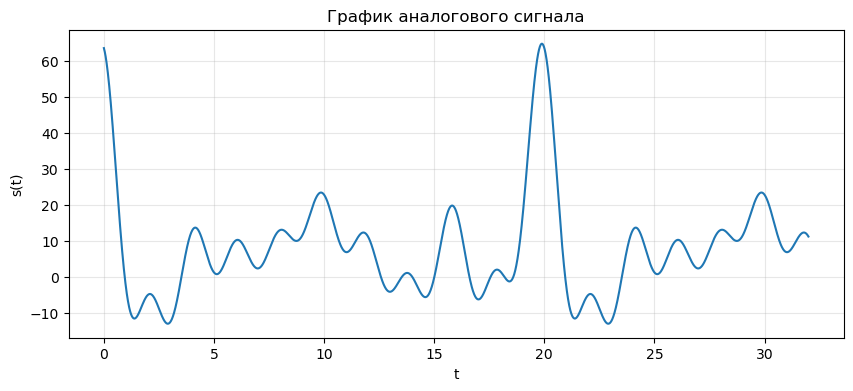

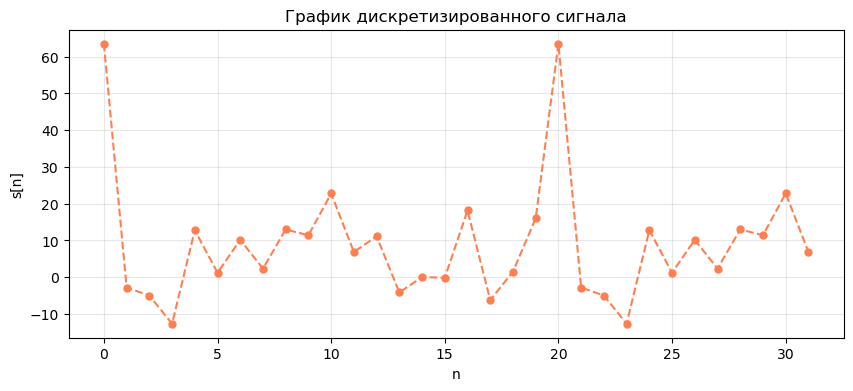

In [47]:
#аналоговый сигнал
def s(t):
    return sum([A[i] * math.cos(w[i]*t + phi[i]) for i in range(n)])

# Дискретные отсчёты
Xn = list(range(N))
S = [s(x) for x in Xn]

X_analog = [i * N / 4096 for i in range(4096)]
S_analog = [s(x) for x in X_analog]

# График аналогового сигнала
plt.figure(figsize=(10, 4))
plt.plot(X_analog, S_analog, linewidth=1.5)
plt.xlabel('t')
plt.ylabel('s(t)')
plt.title('График аналогового сигнала')
plt.grid(True, alpha=0.3)
plt.show()

# График дискретизированного сигнала
plt.figure(figsize=(10, 4))
plt.plot(Xn, S, 'o--', color = 'coral', linewidth=1.5, markersize=5)
plt.xlabel('n')
plt.ylabel('s[n]')
plt.title('График дискретизированного сигнала')
plt.grid(True, alpha=0.3)
plt.show()

## 3. С помощью ДПФ найти дискретные отсчеты спектра дискретного сигнала и визуализировать их.

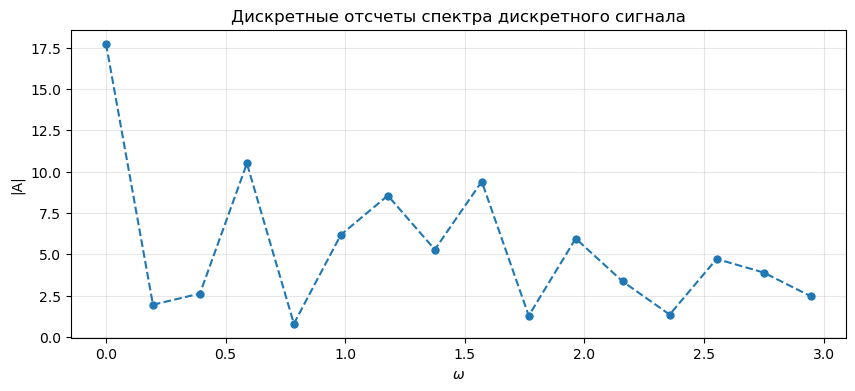

In [61]:
# ДПФ по средствам Фурье
W = np.fft.fftfreq(N, d=T)[:N // 2] * 2 * np.pi
F = np.fft.fft(S, norm='forward')[:N // 2] * 2

# График дискредных отсчетов спектра исходного сигнала
plt.figure(figsize=(10, 4))
plt.plot(W, [abs(f) for f in F], 'o--', linewidth=1.5, markersize=5)
plt.xlabel('$\\omega$')
plt.ylabel('|A|')
plt.title('Дискретные отсчеты спектра дискретного сигнала')
plt.grid(True, alpha=0.3)
plt.show()

## 4. Для дискретного сигнала применить линейное сглаживание по 5-ти и 9-ти точкам, представить формулу для $H(ω)$ – передаточной функции (частотной характеристики) фильтра.

In [82]:
# Линейное сглаживание по 5 точкам
def L_5(S):
    y = []
    for i in range(2, N - 2):
        y.append((S[i-2] + S[i-1] + S[i] + S[i+1] + S[i+2]) / 5)
    return ([0] * 2) + y + ([0] * 2)

# Линейное сглаживание по 9 точкам
def L_9(S):
    y = []
    for i in range(4, N - 4):
        y.append(sum([S[i+k] for k in range(-4, 5)]) / 9)
    return ([0] * 4) + y + ([0] * 4)

Y_L_5 = L_5(S)
Y_L_9 = L_9(S)

**Линейное сглаживание по 5 точкам:**

Фильтр усредняет значение сигнала в окрестности точки \(n\):

$$
y[n] = \frac{1}{5}\big(x[n-2] + x[n-1] + x[n] + x[n+1] + x[n+2]\big)
$$

Его частотная характеристика имеет вид:

$$
H(\omega) = \frac{1}{5}\left(e^{2i\omega} + e^{i\omega} + 1 + e^{-i\omega} + e^{-2i\omega}\right)
= \frac{1 + 2\cos(\omega) + 2\cos(2\omega)}{5}
$$

---

**Линейное сглаживание по 9 точкам:**

Сигнал усредняется по окну из девяти последовательных отсчётов:

$$
y[n] = \frac{1}{9}\sum_{k=-4}^{4} x[n+k]
$$

Соответствующая передаточная функция:

$$
H(\omega) = \frac{1 + 2\sum_{k=1}^{4}\cos(k\omega)}{9}
$$


## 5. Визуализировать полученный после фильтрации дискретный сигнал совместно с исходным дискретным сигналом.

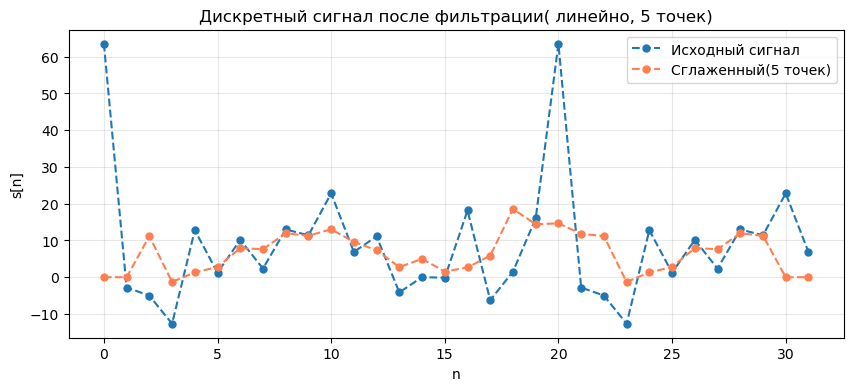

In [88]:
# Сглаженный сигнал (линейно 5 точек)
plt.figure(figsize=(10, 4))
plt.plot(Xn, S, 'o--', label='Исходный сигнал', markersize=5)
plt.plot(Xn, Y_L_5, 'o--', color='coral', label='Сглаженный(5 точек)', markersize=5)
plt.xlabel('n')
plt.ylabel('s[n]')
plt.title('Дискретный сигнал после фильтрации( линейно, 5 точек)')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

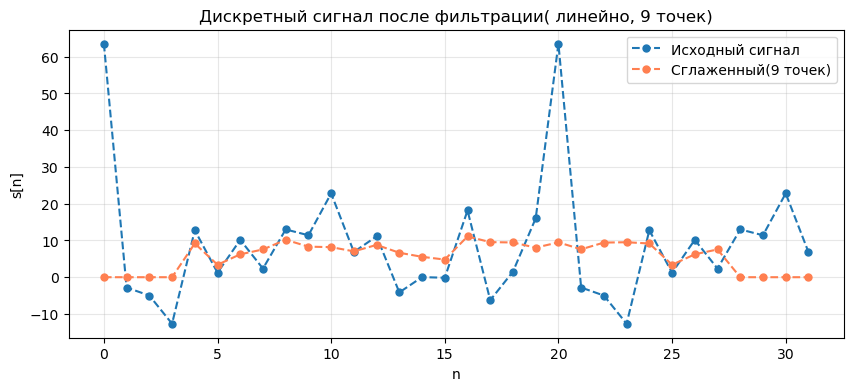

In [90]:
# Сглаженный сигнал (линейно 9 точек)
plt.figure(figsize=(10, 4))
plt.plot(Xn, S, 'o--', label='Исходный сигнал', markersize=5)
plt.plot(Xn, Y_L_9, 'o--', color='coral', label='Сглаженный(9 точек)', markersize=5)
plt.xlabel('n')
plt.ylabel('s[n]')
plt.title('Дискретный сигнал после фильтрации( линейно, 9 точек)')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

## С помощью ДПФ найти дискретные отсчеты спектра дискретного сигнала после его фильтрации и визуализировать их совместно с отчетами спектра исходного дискретного сигнала.

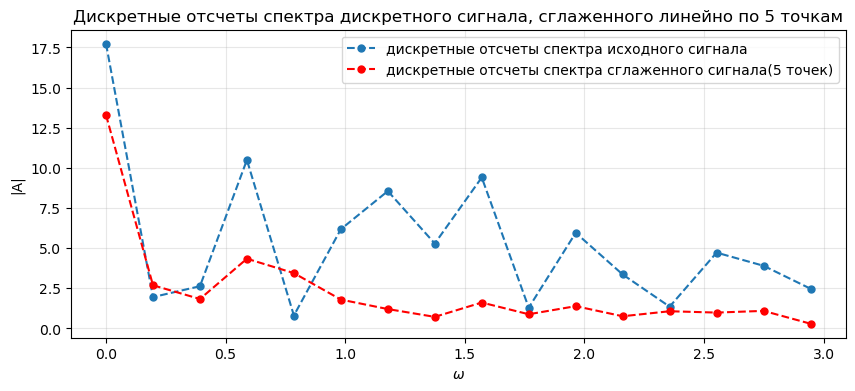

In [99]:
# ДПФ для линейно сглаженных сигналов
F_L_5 = np.fft.fft(Y_L_5, norm='forward')[:N // 2] * 2
F_L_9 = np.fft.fft(Y_L_9, norm='forward')[:N // 2] * 2

# дискретные отсчеты спектра линейно сглаженного сигнала(5 точек)
plt.figure(figsize=(10, 4))
plt.plot(W, [abs(f) for f in F], 'o--', label='дискретные отсчеты спектра исходного сигнала', markersize=5)
plt.plot(W, [abs(f) for f in F_L_5], 'o--', color='red', label='дискретные отсчеты спектра сглаженного сигнала(5 точек)', markersize=5)
plt.xlabel('$\\omega$')
plt.ylabel('|A|')
plt.title('Дискретные отсчеты спектра дискретного сигнала, сглаженного линейно по 5 точкам')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

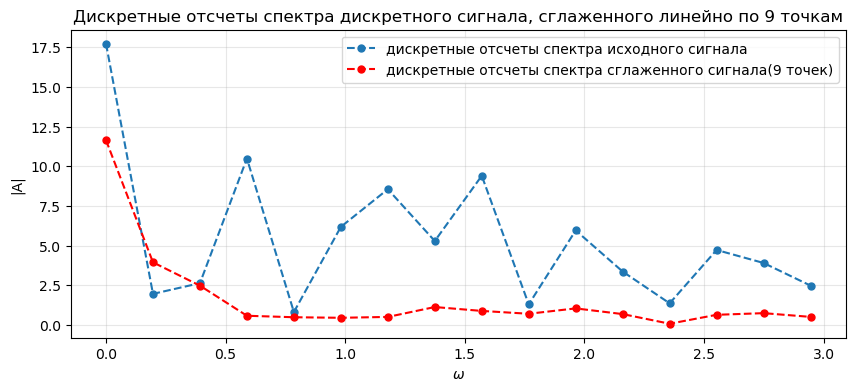

In [105]:
# дискретные отсчеты спектра линейно сглаженного сигнала(9 точек)
plt.figure(figsize=(10, 4))
plt.plot(W, [abs(f) for f in F], 'o--', label='дискретные отсчеты спектра исходного сигнала', markersize=5)
plt.plot(W, [abs(f) for f in F_L_9], 'o--', color='red', label='дискретные отсчеты спектра сглаженного сигнала(9 точек)', markersize=5)
plt.xlabel('$\\omega$')
plt.ylabel('|A|')
plt.title('Дискретные отсчеты спектра дискретного сигнала, сглаженного линейно по 9 точкам')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

## 7. Проанализировать результат на соответствие значениям H(ω). Сделать выводы.

После применения фильтра наблюдается уменьшение амплитуд спектральных компонент, причём степень подавления возрастает по мере удаления частоты от нуля. Увеличение числа точек сглаживания приводит к более выраженному сглаживанию спектра, что соответствует усиленному подавлению высокочастотных составляющих. Характер изменения спектра согласуется с формой частотной характеристики 𝐻(𝜔), полученной ранее.

## 8. Повторить п. 4–7 для следующих фильтров:
    a. Сглаживание полиномом 2-ой степени по 5 и 9 узлам.
    b. Сглаживание полиномом 4-ой степени по 7 и 11 узлам.

## Сглаживание полиномом 2-й степени по 5 и 9 точкам

Ниже приведены выражения для передаточных функций фильтров, основанных на аппроксимации полиномом второй степени.

**Сглаживание по 5 точкам:**

$$
y[n] = \frac{1}{35}\big(-3x[n-2] + 12x[n-1] + 17x[n] + 12x[n+1] - 3x[n+2]\big)
$$

Передаточная функция такого фильтра имеет вид:

$$
H(\omega) = \frac{-3\left(e^{2i\omega} + e^{-2i\omega}\right) + 12\left(e^{i\omega} + e^{-i\omega}\right) + 17}{35}
= \frac{17 + 24\cos(\omega) - 6\cos(2\omega)}{35}
$$

---

**Сглаживание по 9 точкам:**

$$
y[n] = \frac{1}{231}\big(-21x[n-4] + 14x[n-3] + 39x[n-2] + 54x[n-1] + 59x[n] + 54x[n+1] + 39x[n+2] + 14x[n+3] - 21x[n+4]\big)
$$

Соответствующая частотная характеристика:

$$
H(\omega) =
\frac{59 + 108\cos(\omega) + 78\cos(2\omega) + 28\cos(3\omega) - 42\cos(4\omega)}{231}
$$


In [124]:
# Сглаживание полиномом второй степени по 5 точкам
def S_5(S):
    y = []
    for i in range(2, N - 2):
        y.append((-3*S[i-2] + 12*S[i-1] + 17*S[i] + 12*S[i+1] - 3*S[i+2]) / 35)
    return ([0] * 2) + y + ([0] * 2)

# Сглаживание полиномом второй степени по 9 точкам
def S_9(S):
    y = []
    for i in range(4, N - 4):
        y.append((
            -21*S[i-4] + 14*S[i-3] + 39*S[i-2] + 54*S[i-1] + 59*S[i] +
            54*S[i+1] + 39*S[i+2] + 14*S[i+3] - 21*S[i+4]
        ) / 231)
    return ([0] * 4) + y + ([0] * 4)

Y_S_5 = S_5(S)
Y_S_9 = S_9(S)

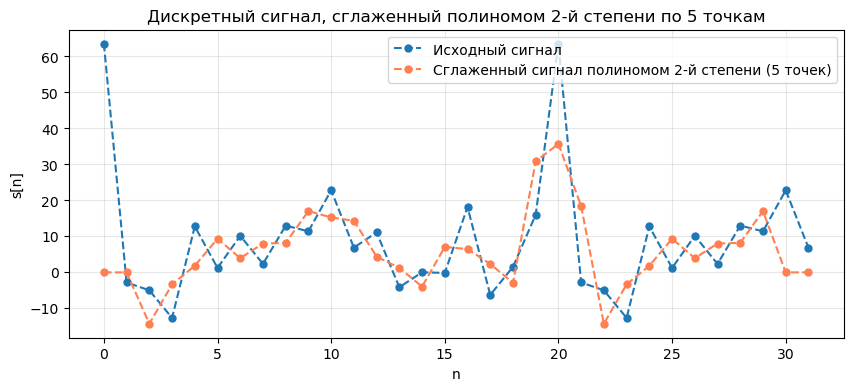

In [126]:
# Сглаженный сигнал полнимом второй степени (5 точек)
plt.figure(figsize=(10, 4))
plt.plot(Xn, S, 'o--', label='Исходный сигнал', markersize=5)
plt.plot(Xn, Y_S_5, 'o--', color='coral', label='Сглаженный сигнал полиномом 2-й степени (5 точек)', markersize=5)
plt.xlabel('n')
plt.ylabel('s[n]')
plt.title('Дискретный сигнал, сглаженный полиномом 2-й степени по 5 точкам')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

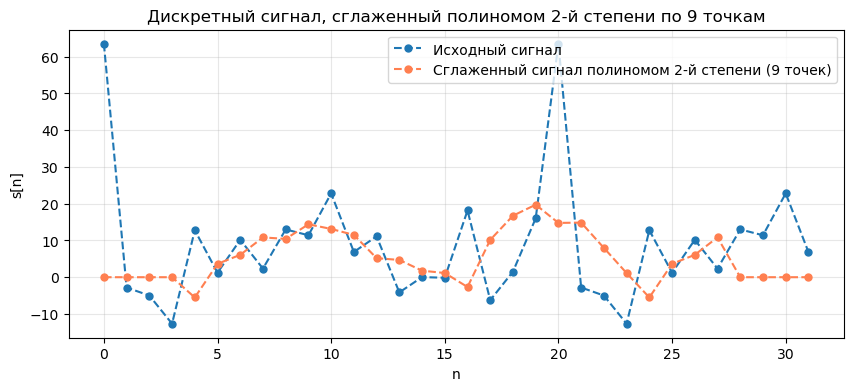

In [128]:
# Сглаженный сигнал полнимом второй степени (5 точек)
plt.figure(figsize=(10, 4))
plt.plot(Xn, S, 'o--', label='Исходный сигнал', markersize=5)
plt.plot(Xn, Y_S_9, 'o--', color='coral', label='Сглаженный сигнал полиномом 2-й степени (9 точек)', markersize=5)
plt.xlabel('n')
plt.ylabel('s[n]')
plt.title('Дискретный сигнал, сглаженный полиномом 2-й степени по 9 точкам')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

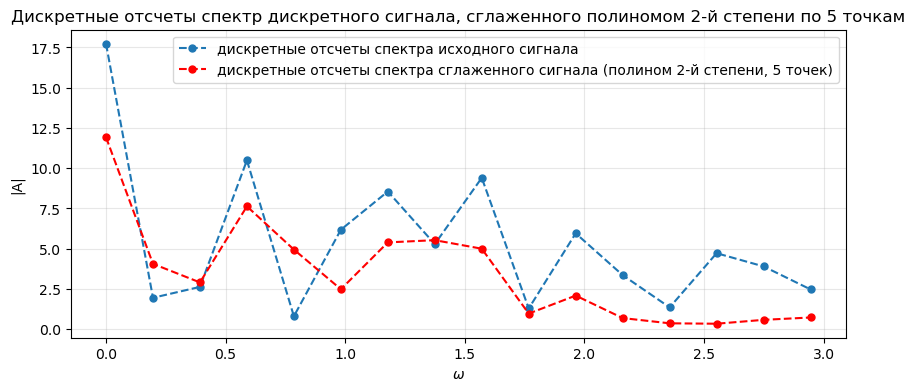

In [132]:
# ДПФ для сглаженных сигналов полиномом второй степени
F_S_5 = np.fft.fft(Y_S_5, norm='forward')[:N // 2] * 2
F_S_9 = np.fft.fft(Y_S_9, norm='forward')[:N // 2] * 2

# дискретные отсчеты спектра сглаженного сигнала полнимом второй степени (5 точек)
plt.figure(figsize=(10, 4))
plt.plot(W, [abs(f) for f in F], 'o--', label='дискретные отсчеты спектра исходного сигнала', markersize=5)
plt.plot(W, [abs(f) for f in F_S_5], 'o--', color='red', label='дискретные отсчеты спектра сглаженного сигнала (полином 2-й степени, 5 точек)', markersize=5)
plt.xlabel('$\\omega$')
plt.ylabel('|A|')
plt.title('Дискретные отсчеты спектр дискретного сигнала, сглаженного полиномом 2-й степени по 5 точкам')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

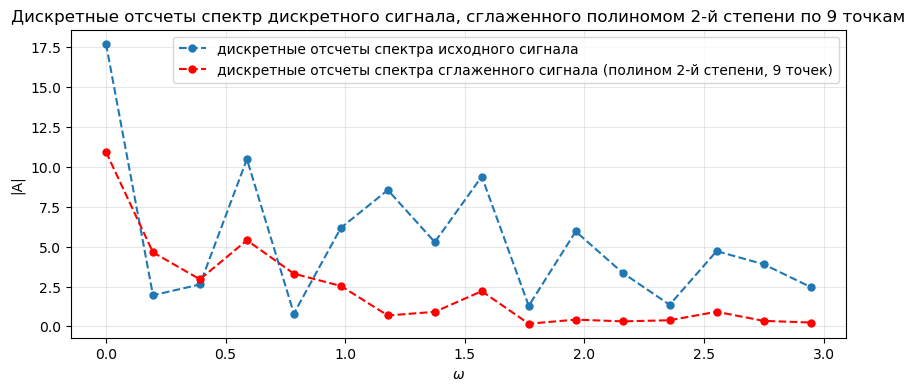

In [134]:
# дискретные отсчеты спектра сглаженного сигнала полнимом второй степени (5 точек)
plt.figure(figsize=(10, 4))
plt.plot(W, [abs(f) for f in F], 'o--', label='дискретные отсчеты спектра исходного сигнала', markersize=5)
plt.plot(W, [abs(f) for f in F_S_9], 'o--', color='red', label='дискретные отсчеты спектра сглаженного сигнала (полином 2-й степени, 9 точек)', markersize=5)
plt.xlabel('$\\omega$')
plt.ylabel('|A|')
plt.title('Дискретные отсчеты спектр дискретного сигнала, сглаженного полиномом 2-й степени по 9 точкам')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

## Проанализировать результат на соответствие значениям H(ω). Сделать выводы.

По графикам видно, что в сравнении с предыдущим фильтром полоса пропускания стала шире, однако по мере удаления частоты от нуля её величина постепенно уменьшается. Увеличение числа точек сглаживания приводит к сужению полосы пропускания. Наблюдаемое поведение согласуется с частотной характеристикой H(ω), рассчитанной ранее.

Полиномиальные фильтры второго порядка менее агрессивны, чем простое линейное усреднение.
Они лучше сохраняют форму низкочастотных составляющих сигнала, что особенно заметно для гармоник с малыми частотами — их амплитуда уменьшается слабее.

В отличие от линейного усреднения, подавляющего высокие частоты очень резко (из-за нулей в 
H(ω)), полиномиальные фильтры обеспечивают более плавное снижение амплитуд, что проявляется в отсутствии глубоких провалов в спектре.

## Сглаживание полиномом 4-й степени по 7 и 11 точкам

Ниже приведены выражения для фильтров, основанных на аппроксимации полиномом четвёртой степени, а также их частотные характеристики.

**Сглаживание по 7 точкам:**

$$
y[n] = \frac{1}{231}\big(5x[n-3] - 30x[n-2] + 75x[n-1] + 131x[n] + 75x[n+1] - 30x[n+2] + 5x[n+3]\big)
$$

Частотная характеристика имеет вид:

$$
H(\omega) = \frac{131 + 150\cos(\omega) - 60\cos(2\omega) + 10\cos(3\omega)}{231}
$$

---

**Сглаживание по 11 точкам:**

$$
y[n] = \frac{1}{429}\big(18x[n-5] - 45x[n-4] - 10x[n-3] + 60x[n-2] + 120x[n-1] + 143x[n] + 120x[n+1] + 60x[n+2] - 10x[n+3] - 45x[n+4] + 18x[n+5]\big)
$$

Передаточная функция для этого окна:

$$
H(\omega) = \frac{143 + 240\cos(\omega) + 120\cos(2\omega) - 20\cos(3\omega) - 90\cos(4\omega) + 36\cos(5\omega)}{429}
$$


In [145]:
# Сглаживание сигнала полиномом четвёртой степени по 7 точкам
def Q_7(S):
    y = []
    for i in range(3, N - 3):
        y.append((
            5*S[i-3] - 30*S[i-2] + 75*S[i-1] + 131*S[i]
            + 75*S[i+1] - 30*S[i+2] + 5*S[i+3]
        ) / 231)
    return ([0] * 3) + y + ([0] * 3)

# Сглаживание сигнала полиномом четвёртой степени по 11 точкам
def Q_11(S):
    y = []
    for i in range(5, N - 5):
        y.append((
            18*S[i-5] - 45*S[i-4] - 10*S[i-3] + 60*S[i-2] + 120*S[i-1] + 143*S[i] +
            120*S[i+1] + 60*S[i+2] - 10*S[i+3] - 45*S[i+4] + 18*S[i+5]
        ) / 429)
    return ([0] * 5) + y + ([0] * 5)

Y_Q_7 = Q_7(S)
Y_Q_11 = Q_11(S)

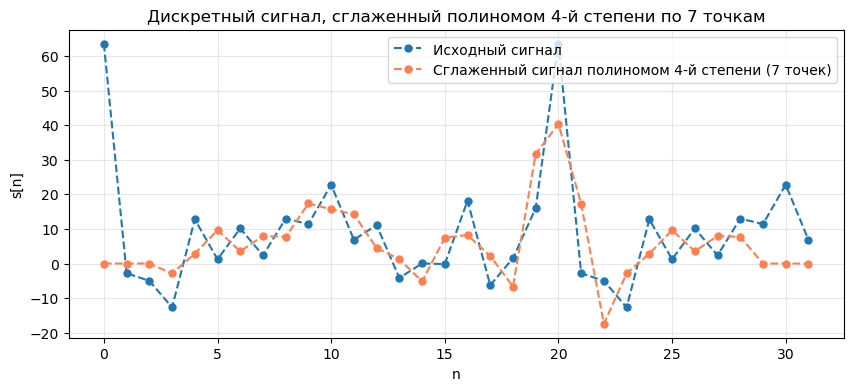

In [147]:
# Сглаженный сигнал полиномом четвёртой степени (7 точек)
plt.figure(figsize=(10, 4))
plt.plot(Xn, S, 'o--', label='Исходный сигнал', markersize=5)
plt.plot(Xn, Y_Q_7, 'o--', color='coral', label='Сглаженный сигнал полиномом 4-й степени (7 точек)', markersize=5)
plt.xlabel('n')
plt.ylabel('s[n]')
plt.title('Дискретный сигнал, сглаженный полиномом 4-й степени по 7 точкам')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

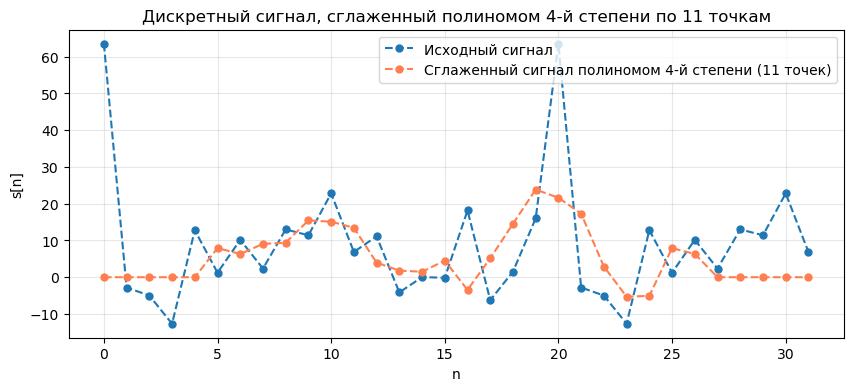

In [149]:
# Сглаженный сигнал полиномом четвёртой степени (11 точек)
plt.figure(figsize=(10, 4))
plt.plot(Xn, S, 'o--', label='Исходный сигнал', markersize=5)
plt.plot(Xn, Y_Q_11, 'o--', color='coral', label='Сглаженный сигнал полиномом 4-й степени (11 точек)', markersize=5)
plt.xlabel('n')
plt.ylabel('s[n]')
plt.title('Дискретный сигнал, сглаженный полиномом 4-й степени по 11 точкам')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

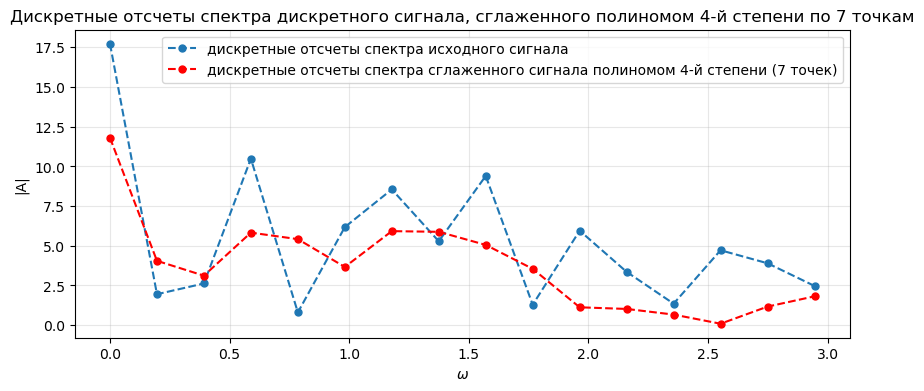

In [151]:
# ДПФ для сглаженных сигналов полиномом четвёртой степени
F_Q_7 = np.fft.fft(Y_Q_7, norm='forward')[:N // 2] * 2
F_Q_11 = np.fft.fft(Y_Q_11, norm='forward')[:N // 2] * 2

# дискретные отсчеты спектра сглаженного сигнала полниномом четвёртой степени (7 точек)
plt.figure(figsize=(10, 4))
plt.plot(W, [abs(f) for f in F], 'o--', label='дискретные отсчеты спектра исходного сигнала', markersize=5)
plt.plot(W, [abs(f) for f in F_Q_7], 'o--', color='red', label='дискретные отсчеты спектра сглаженного сигнала полиномом 4-й степени (7 точек)', markersize=5)
plt.xlabel('$\\omega$')
plt.ylabel('|A|')
plt.title('Дискретные отсчеты спектра дискретного сигнала, сглаженного полиномом 4-й степени по 7 точкам')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

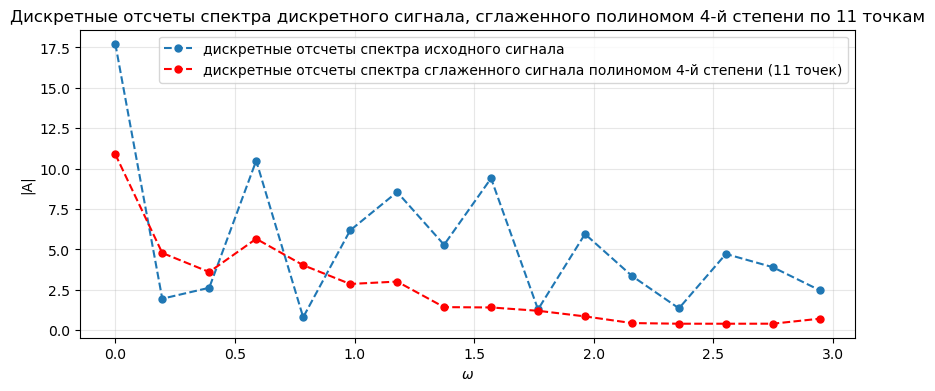

In [153]:
# дискретные отсчеты спектра сглаженного сигнала полниномом четвёртой степени (11 точек)
plt.figure(figsize=(10, 4))
plt.plot(W, [abs(f) for f in F], 'o--', label='дискретные отсчеты спектра исходного сигнала', markersize=5)
plt.plot(W, [abs(f) for f in F_Q_11], 'o--', color='red', label='дискретные отсчеты спектра сглаженного сигнала полиномом 4-й степени (11 точек)', markersize=5)
plt.xlabel('$\\omega$')
plt.ylabel('|A|')
plt.title('Дискретные отсчеты спектра дискретного сигнала, сглаженного полиномом 4-й степени по 11 точкам')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

## Проанализировать результат на соответствие значениям H(ω). Сделать выводы.


По графикам видно, что по сравнению с фильтром второго порядка полоса пропускания стала немного шире, что обеспечивает лучшее сохранение низкочастотных составляющих сигнала. При удалении от нуля наблюдается постепенное уменьшение полосы пропускания, а увеличение числа точек сглаживания приводит к её сужению. Результаты полностью согласуются с теоретической частотной характеристикой 
H(ω), рассчитанной ранее.

Фильтры четвёртой степени обеспечивают более точное аппроксимирование локальной формы сигнала, что снижает искажения амплитуд низкочастотных гармоник.

Увеличение длины окна фильтра усиливает подавление высоких частот, делая сигнал более гладким, но одновременно снижает детализацию быстрых изменений.

## Выводы

В ходе выполнения работы был сформирован дискретный сигнал путем дискретизации непрерывного сигнала, представленного в виде линейной комбинации 11 косинусоид:

$$
A_k \cos(\omega_k t + \varphi_k)
$$

для которых случайным образом были сгенерированы амплитуды и фазы. Для полученного дискретного сигнала был построен спектр с использованием дискретного преобразования Фурье (ДПФ).

Для анализа влияния фильтрации на сигнал применялись следующие методы сглаживания:

1. **Линейное сглаживание** по 5 и 9 точкам  
2. **Сглаживание полиномом 2-й степени** по 5 и 9 точкам  
3. **Сглаживание полиномом 4-й степени** по 7 и 11 точкам  

Для всех сглаженных сигналов также были рассчитаны спектры с помощью ДПФ.

**Основные наблюдения:**

- Линейное сглаживание наиболее эффективно подавляет высокочастотные составляющие, что соответствует его роли низкочастотного фильтра.  
- Полиномиальное сглаживание 2-й степени демонстрирует более широкую полосу пропускания по сравнению с линейным фильтром, что позволяет лучше сохранять детали сигнала.  
- Фильтры 4-й степени обеспечивают наилучшее сохранение формы сигнала внутри полосы пропускания, минимизируя искажения низкочастотных гармоник.  
- Увеличение количества точек сглаживания во всех типах фильтров приводит к более сильному подавлению высоких частот и более резкому снижению амплитуд в спектре.  
- Практические результаты полностью соответствуют теоретическим передаточным функциям $H(\omega)\$, рассчитанным аналитически в предыдущих работах.

Таким образом, работа позволила получить практический опыт применения полиномиальных фильтров для обработки дискретных сигналов и анализа их частотных характеристик с помощью ДПФ.
